In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# для отображения статических графиков прямо в ноутбуке
%matplotlib inline

In [6]:
arr = np.loadtxt('stockholm_td_adj_dat.txt')

In [9]:
print([arr[0]])

[array([  1.80000000e+03,   1.00000000e+00,   1.00000000e+00,
        -6.10000000e+00,  -6.10000000e+00,  -6.10000000e+00,
         1.00000000e+00])]


In [18]:
mouth = int(input())
mins=[]
maxs=[]
means = [] 
days=[]
datas = arr[arr[:, 1]==mouth]
print(datas)
maxday = int(np.max(datas[:,2]) )
print(maxday)
for i in range(1, maxday+1):
    current = datas[datas[:,2]==i]
    means.append(np.mean(current[:, 3]))
    mins.append(np.min(current[:, 3]))
    maxs.append(np.max(current[:, 3]))
    days.append(i)

    

5
[[  1.80000000e+03   5.00000000e+00   1.00000000e+00 ...,   6.20000000e+00
    6.20000000e+00   1.00000000e+00]
 [  1.80000000e+03   5.00000000e+00   2.00000000e+00 ...,   7.20000000e+00
    7.20000000e+00   1.00000000e+00]
 [  1.80000000e+03   5.00000000e+00   3.00000000e+00 ...,   1.20000000e+01
    1.20000000e+01   1.00000000e+00]
 ..., 
 [  2.01100000e+03   5.00000000e+00   2.90000000e+01 ...,   1.14000000e+01
    1.14000000e+01   1.00000000e+00]
 [  2.01100000e+03   5.00000000e+00   3.00000000e+01 ...,   1.48000000e+01
    1.48000000e+01   1.00000000e+00]
 [  2.01100000e+03   5.00000000e+00   3.10000000e+01 ...,   1.64000000e+01
    1.64000000e+01   1.00000000e+00]]
31


In [29]:
newdata = datas[:, 3].reshape(-1, maxday)
mini = np.min(newdata, axis = 0)
maxi = np.max(newdata, axis = 0)
meani = np.mean(newdata, axis = 0)
print(mini)

[-1.2 -0.9 -0.8 -0.3  0.3  0.9 -0.5 -2.6 -0.7 -0.4  0.6 -1.3 -2.3 -0.1  0.9
  0.9  1.6  0.5  1.6  2.3  1.9  1.6  1.4  0.3  1.1  1.3  2.5  3.6  3.5  2.4
  2.7]


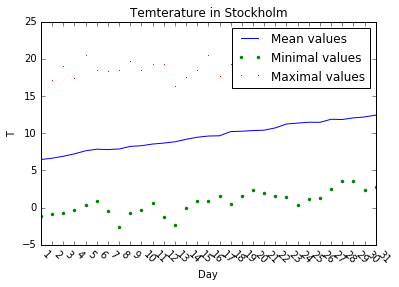

In [31]:
ticks = np.array(days)
plt.xticks(ticks);

plt.gca().set_xticklabels(ticks, horizontalalignment='left', rotation=-45)

plt.plot(days, meani, "-", label="Mean values")
plt.plot(days, mini, ".", label="Minimal values")
plt.plot(days, maxi, ",", label="Maximal values")
plt.xlabel('Day')
plt.ylabel('T')
plt.title('Temterature in Stockholm')

plt.legend(loc='upper right', ncol=1)

In [32]:
import numpy.random as npr

In [50]:
#nodes = npr.rand(500, 2)
nodes= np.random.uniform(-1,1,(1000,2))

nodes.shape 

newnodes=nodes[nodes[:,1]**2+ nodes[:,0]**2<=1]
print(newnodes.shape)

(777, 2)


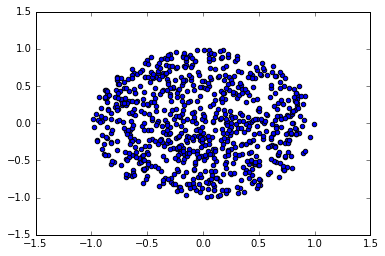

In [51]:
plt.scatter(newnodes[:,0], newnodes[:,1],  cmap='RdBu')

In [52]:

from scipy.spatial import Delaunay
tri = Delaunay(newnodes)

In [53]:
elems = tri.simplices

In [54]:
z = np.sin(newnodes[:,0]+newnodes[:,1])+np.absolute(newnodes[:,0]) + np.absolute(newnodes[:,1])
print(z.shape)

(777,)


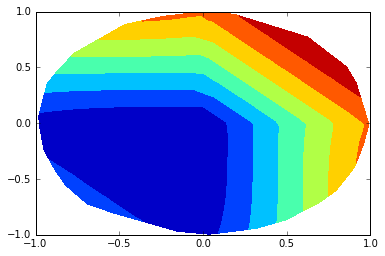

In [55]:

plt.tricontourf(newnodes[:,0], newnodes[:,1], elems, z)